In [1]:
#importing basic packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("F:\PYTHON\python statistics and ML classes notes\Machine Learning Classes\Supevice Machine Learning\projects in jupyter\Classified Data")

In [12]:
df['TARGET CLASS'].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

In [9]:
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_feat

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...,...
995,1.716463,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,1.719927,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,1.723391,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,1.726856,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [4]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
df.isnull().sum()

Unnamed: 0      0
WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [6]:
#performing feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis = 1))
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))

In [10]:
x = df_feat
y = df['TARGET CLASS']

In [16]:
#split the data into traning and test
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test =  train_test_split(x, y, train_size= 0.75, random_state = 101)

# KNN Model

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
#prediction and Evaluation by using confusion matrix, accuracy score and classification report

In [23]:
pred_train = knn.predict(x_train)
pred_test = knn.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [24]:
print(confusion_matrix(y_train, pred_train))

print("\n")

print(confusion_matrix(y_test, pred_test))

[[366   0]
 [  0 384]]


[[122  12]
 [  9 107]]


In [25]:
print(classification_report(y_train, pred_train))

print("\n")

print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       366
           1       1.00      1.00      1.00       384

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



              precision    recall  f1-score   support

           0       0.93      0.91      0.92       134
           1       0.90      0.92      0.91       116

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



In [26]:
print(accuracy_score(y_train, pred_train))

print("\n")

print(accuracy_score(y_test, pred_test))

1.0


0.916


In [27]:
#To find the best hyperparameter tunning (K) by using "ELBOW Method"

In [31]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i =  knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [32]:
error_rate

[0.084,
 0.088,
 0.076,
 0.072,
 0.076,
 0.06,
 0.064,
 0.056,
 0.048,
 0.056,
 0.048,
 0.056,
 0.056,
 0.06,
 0.06,
 0.06,
 0.048,
 0.056,
 0.056,
 0.056,
 0.048,
 0.052,
 0.048,
 0.048,
 0.048,
 0.048,
 0.044,
 0.044,
 0.044,
 0.036,
 0.044,
 0.044,
 0.048,
 0.048,
 0.052,
 0.048,
 0.052,
 0.048,
 0.056]

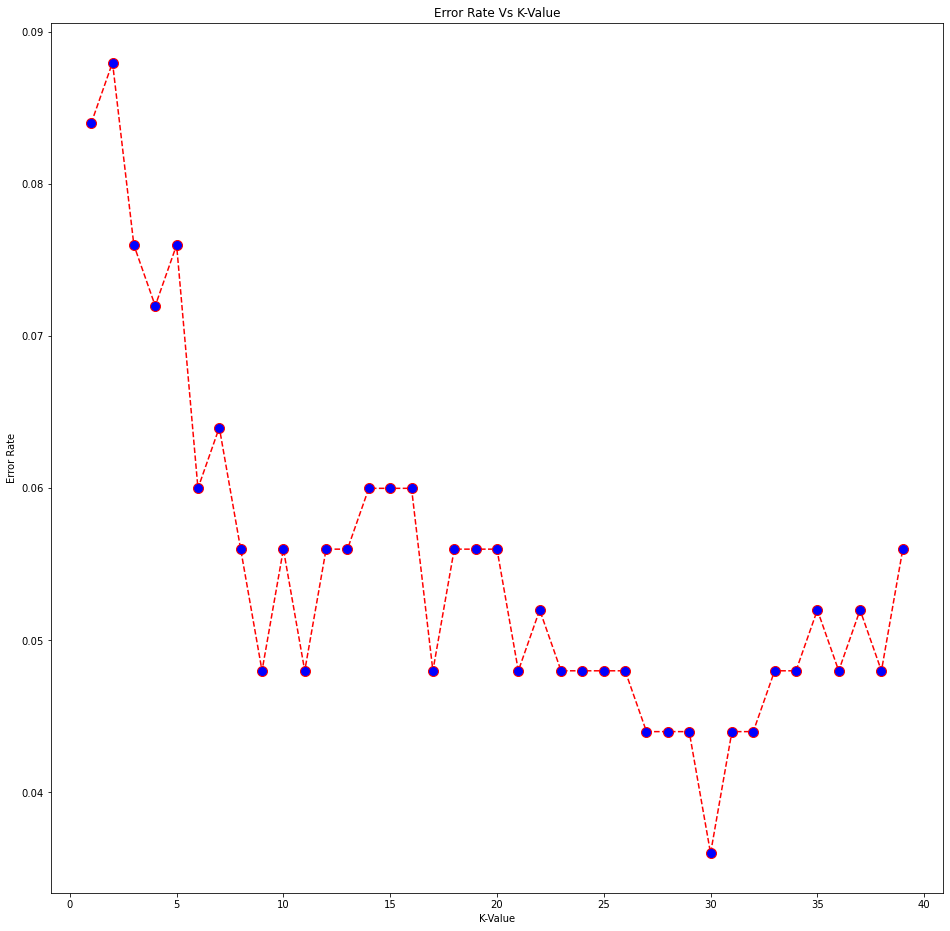

In [34]:
plt.figure(figsize = (16,16))
plt.plot(range(1,40), error_rate, color = 'red', linestyle = "dashed", marker = 'o',markerfacecolor = 'blue', markersize = 10)
plt.title("Error Rate Vs K-Value")
plt.xlabel("K-Value")
plt.ylabel("Error Rate")
plt.show()

In [38]:
knn = KNeighborsClassifier(n_neighbors = 31)
knn.fit(x_train,  y_train)

KNeighborsClassifier(n_neighbors=31)

In [40]:
y_pred = knn.predict(x_test)

In [41]:
print(accuracy_score(y_test,pred_test))

0.916


In [43]:
from  sklearn.model_selection import cross_val_score
accuracy  =  cross_val_score(knn, X = x_test, y = y_test,  cv = 10)
print(accuracy)

[0.96 0.92 1.   0.92 0.96 0.92 1.   1.   0.96 0.96]


In [44]:
print("Test Accuracy Score: ", accuracy[2])

Test Accuracy Score:  1.0


# Traning accuracy  = 100%
# Testing accuracy  = 91%